In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [89]:
df = pd.read_csv("/content/MY2022 Fuel Consumption Ratings.csv")

In [90]:
df.shape

(946, 15)

In [91]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [92]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [93]:
df.tail()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5
945,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252,5,7


In [94]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [96]:
print(df.isnull().any())

Model Year                           False
Make                                 False
Model                                False
Vehicle Class                        False
Engine Size(L)                       False
Cylinders                            False
Transmission                         False
Fuel Type                            False
Fuel Consumption (City (L/100 km)    False
Fuel Consumption(Hwy (L/100 km))     False
Fuel Consumption(Comb (L/100 km))    False
Fuel Consumption(Comb (mpg))         False
CO2 Emissions(g/km)                  False
CO2 Rating                           False
Smog Rating                          False
dtype: bool


In [97]:
print(df.isnull().sum())

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64


In [98]:
duplicated_mask = df.duplicated()
duplicated_rows = df[duplicated_mask]
duplicated_rows

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating


In [99]:
mean_val = df['CO2 Emissions(g/km)'].mean()
std_dev = df['CO2 Emissions(g/km)'].std()

threshold = 3
#first we calculate z score i.e absolute difference between mean and standard deviation
#then we check if the abs value is greater than threshold value.
#it that value is greater than threshold then outlier_mask will be true
outlier_mask = np.abs((df['CO2 Emissions(g/km)'] - mean_val) / std_dev) > threshold

#it performs negation on outlier_mask
#it excludes if outlier_mask is true as its negtion is false
#and only includes if outlier_,ask is true
df_no_outliers = df[~outlier_mask]

In [100]:
print("Initial size" ,df.shape)
print("After removing outliers",df_no_outliers.shape)

Initial size (946, 15)
After removing outliers (939, 15)


In [101]:
cdf = df_no_outliers[['Fuel Consumption (City (L/100 km)',	'Fuel Consumption(Hwy (L/100 km))',	'Fuel Consumption(Comb (L/100 km))',	'Fuel Consumption(Comb (mpg))'	,'CO2 Emissions(g/km)',	'CO2 Rating',	'Smog Rating']]

In [102]:
cdf.head()

,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,9.9,7.0,8.6,33,200,6,3
1,12.6,9.4,11.2,25,263,4,5
2,11.0,8.6,9.9,29,232,5,6
3,11.3,9.1,10.3,27,242,5,6
4,11.2,8.0,9.8,29,230,5,7


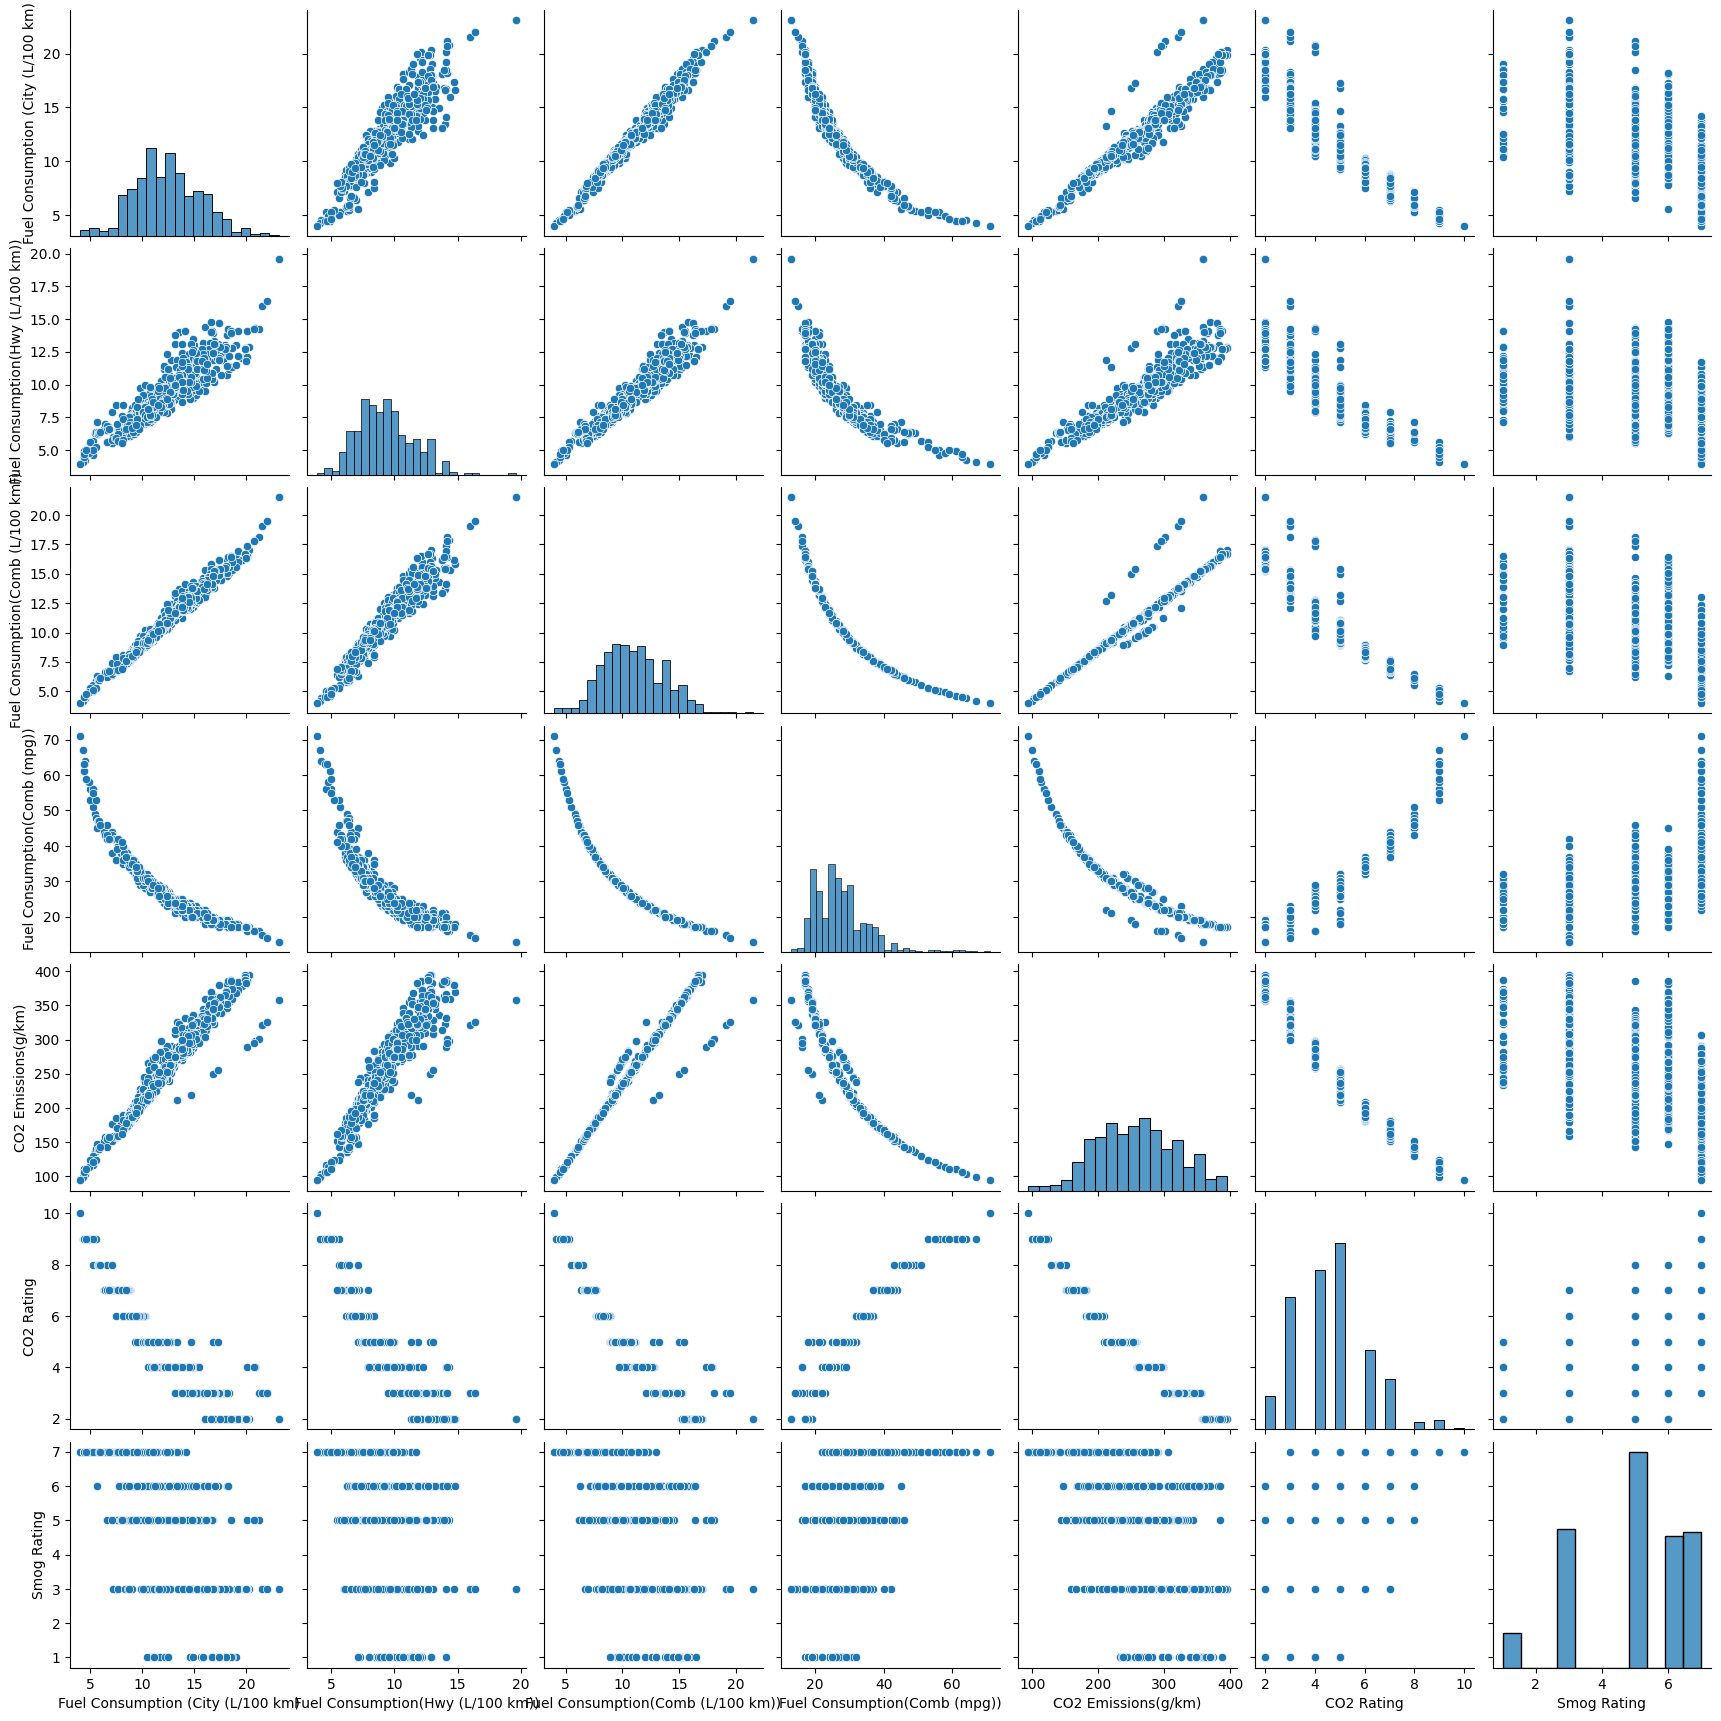

In [103]:
sns.pairplot(cdf)
plt.show()

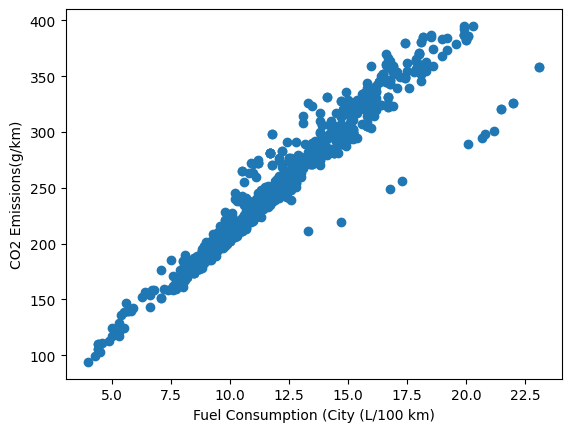

In [104]:
plt.scatter(cdf[['Fuel Consumption (City (L/100 km)']],cdf[['CO2 Emissions(g/km)']])
plt.xlabel('Fuel Consumption (City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [105]:
#asanyarray will convert input into array but through ndarray subclass
x = np.asanyarray(cdf[['Fuel Consumption (City (L/100 km)']])
y = np.asanyarray(cdf[['CO2 Emissions(g/km)']])

In [106]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [107]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(751, 1) (188, 1) (751, 1) (188, 1)


In [108]:
reg = LinearRegression()
reg.fit(x_train,y_train)
#coef_ means slope of regression line
print(reg.coef_)
#intercept is a line where regression line meets y-axis
print(reg.intercept_)

[[17.89772207]]
[35.4563199]


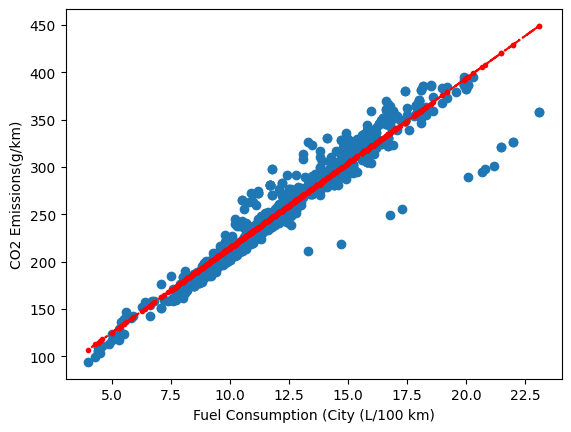

In [109]:
plt.scatter(cdf[['Fuel Consumption (City (L/100 km)']],cdf[['CO2 Emissions(g/km)']])

#it will plot values according to slope
#here reg_coef is slope
#and reg_intercept_ refers to intercept
#it will compare slope value with intercept and plot a red line with dots
plt.plot(x_train,reg.coef_[0][0] * x_train + reg.intercept_[0],'.-.r')
plt.xlabel('Fuel Consumption (City (L/100 km)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [110]:
y_hat = reg.predict(x_test)
print("R2 score",r2_score(y_test,y_hat))
print("MSE ",mean_squared_error(y_test,y_hat))
print("RSME ",np.sqrt(mean_squared_error(y_test,y_hat)))
print("MAE ",mean_absolute_error(y_test,y_hat))

R2 score 0.9286568747252507
MSE  271.44063238956113
RSME  16.475455453175222
MAE  10.340038661986679


                                                              #################

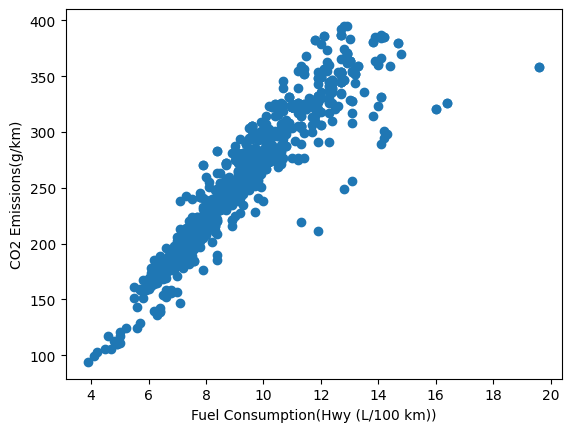

In [111]:
plt.scatter(cdf[['Fuel Consumption(Hwy (L/100 km))']],cdf[['CO2 Emissions(g/km)']])
plt.xlabel('Fuel Consumption(Hwy (L/100 km))')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

In [112]:
x = np.asanyarray(cdf[["Fuel Consumption(Hwy (L/100 km))"]])
y = np.asanyarray(cdf[["CO2 Emissions(g/km)"]])

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [114]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[25.35140582]]
[21.38711249]


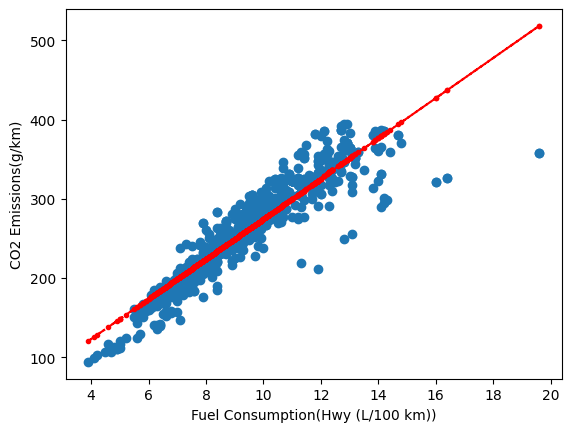

In [115]:
plt.scatter(cdf[["Fuel Consumption(Hwy (L/100 km))"]], cdf[["CO2 Emissions(g/km)"]])
plt.plot(x_train , regressor.coef_[0][0]*x_train + regressor.intercept_[0], '.-.r')
plt.xlabel("Fuel Consumption(Hwy (L/100 km))")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()

In [116]:
y_hat = regressor.predict(x_test)
print("R2_Score: ", r2_score(y_test, y_hat))
print("MSE(mean squared error) : ", mean_squared_error(y_test, y_hat))
print("RMSE(root MSE) : ", np.sqrt(mean_squared_error(y_test, y_hat)))
print("MAE(mean absolute error) : ", mean_absolute_error(y_test, y_hat))

R2_Score:  0.8732615418579328
MSE(mean squared error) :  482.2043762965991
RMSE(root MSE) :  21.959152449413867
MAE(mean absolute error) :  15.08698290879439


                                                        ######################

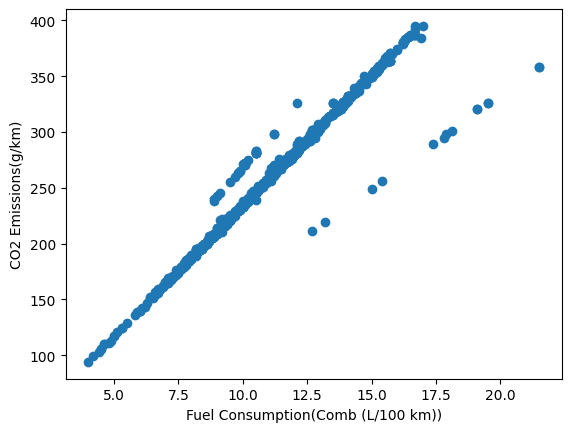

In [123]:
plt.scatter(cdf[["Fuel Consumption(Comb (L/100 km))"]], cdf[["CO2 Emissions(g/km)"]])
plt.xlabel("Fuel Consumption(Comb (L/100 km))")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()

In [124]:
x = np.asanyarray(cdf[["Fuel Consumption(Comb (L/100 km))"]])
y = np.asanyarray(cdf[["CO2 Emissions(g/km)"]])

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [126]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[[21.39903681]]
[21.80579442]


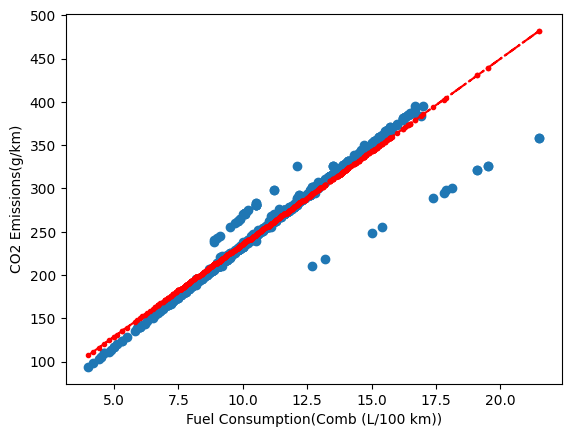

In [127]:
plt.scatter(cdf[["Fuel Consumption(Comb (L/100 km))"]], cdf[["CO2 Emissions(g/km)"]])
plt.plot(x_train , regressor.coef_[0][0]*x_train + regressor.intercept_[0], '.-.r')
plt.xlabel("Fuel Consumption(Comb (L/100 km))")
plt.ylabel("CO2 Emissions(g/km)")
plt.show()

In [128]:
y_hat = regressor.predict(x_test)
print("R2_Score: ", r2_score(y_test, y_hat))
print("MSE(mean squared error) : ", mean_squared_error(y_test, y_hat))
print("RMSE(root MSE) : ", np.sqrt(mean_squared_error(y_test, y_hat)))
print("MAE(mean absolute error) : ", mean_absolute_error(y_test, y_hat))

R2_Score:  0.9486009075513333
MSE(mean squared error) :  195.55916712067025
RMSE(root MSE) :  13.984247105964277
MAE(mean absolute error) :  6.382889659443455


In [129]:
print("CO2 Emmisions:")
table = pd.DataFrame()
table['X'] = ['Fuel Consumption(City (L/100 km))', 'Fuel Consumption(Hwy (L/100 km))', 'Fuel Consumption(Comb (L/100 km))']
table['MSE'] = [271.44, 482.204, 195.56]
table['RMSE'] = [16.475, 21.96, 13.984]
table['MAE'] = [10.34, 15.086, 6.383]
table['R2_score'] = [0.9286, 0.8733, 0.9486]
print(table)

CO2 Emmisions:
                                   X      MSE    RMSE     MAE  R2_score
0  Fuel Consumption(City (L/100 km))  271.440  16.475  10.340    0.9286
1   Fuel Consumption(Hwy (L/100 km))  482.204  21.960  15.086    0.8733
2  Fuel Consumption(Comb (L/100 km))  195.560  13.984   6.383    0.9486
